# IMPORT THE LIBRARIES

In [ ]:
#exc1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.parser import parse
from itertools import compress
from collections import OrderedDict
from datetime import date
import datetime
from datetime import timedelta
import re
import seaborn as sns

# LOAD THE PI DATA

In [2]:
#Sheet From Pi
#Step1: Load the Data for the month as a dataframe in pandas
df_JAN2019Pi = pd.read_excel(r'C:\Users\v.t.flores\Documents\PiDataDeZn_ML.xlsx', sheet_name='PiData_dezn_ntrl', index_col=False)

#Drop the row[1]
df_JAN2019Pi = df_JAN2019Pi.drop(df_JAN2019Pi.index[0])
#Step2: Parse the DATETIME column
df_JAN2019Pi['DATETIME'] = df_JAN2019Pi['DATETIME'].apply(lambda x: parse(str(x)))

df_JAN2019Pi.set_index('DATETIME', inplace=True)
df_Pi = df_JAN2019Pi

### Visualize data to check for null values

#### Check the columnames

In [423]:
df_Pi.columns

Index(['DeZn_Feed_FR', 'DeZn_Feed_Temp', '105TK01_H2S_FR_A',
       '105TK01_H2S_FR_B', '105TK01_N2_FR', '105TK01_Press', '105TK02_Press',
       '105TK02_H2S_FR_A', '105TK02_H2S_FR_B', 'Seed_FR', '105TK03_Press',
       '105TK05_Press', '105TK05_Temp', '105TK05_steam', '105TK05_level'],
      dtype='object')

#### Change the values to numeric

In [3]:
for i in df_Pi.columns:
    df_Pi[i] = pd.to_numeric(df_Pi[i], errors='coerce')


#### DECLARE THE FUNCTIONS

In [102]:
#fcn dfn
#used in the analysis results data. cleans up the sampling time entry
def time_cleaner(x):
    time_regex = re.compile(r'[0-8a-zA-Z:]', re.IGNORECASE| re.VERBOSE|re.DOTALL)
    timeact = time_regex.findall(x)
    newtime = ''.join(timeact)
    t = parse(x)
    new_str_time = str(t.hour)+':'+str(t.minute)+':'+str(t.second)
    return new_str_time
#--------------------------------------------

def ave_filler(colname):
    dfcn = df_main[colname]
    try:        
        dfcn = pd.to_numeric(dfcn, errors='coerce')
    except:
        print('error found in' + str(colname))
        pass
    try:
        df_main[colname] = dfcn.where(dfcn.notnull(), other=(dfcn.fillna(method='ffill') + dfcn.fillna(method='bfill'))/2)
    except:
        print('nan not fixed' + str(colname))   
    return df_main
#---------------------------------------------

def generate_df_from_analysis(workbookTab, col_sampleDate, col_sampleTime, col_analysis, col_title):
    #get the start and end sample dates
    Smpl_day_index = list()
    Chem_Element_datelist = list()
    Chem_Element_list = list()
    
    Smpl_day_index = list()
    Chem_Element_datelist = list()
    Chem_Element_list = list()
    plus_oneday_list = ['0:0:0', '1:0:0', '2:0:0', '3:0:0', '4:0:0', '5:0:0']
    #gets the date day from the B column of the analysis file if there is value in the cell
    for i in range(1, workbookTab.max_row):
        if type(workbookTab[str(col_sampleDate) + str(i)].value) == int or type(workbookTab[str(col_sampleDate) + str(i)].value) == float:
            Smpl_day_index.append(i)
    #get the ending row that has date day
    for j in range(1, workbookTab.max_row):
        if type(workbookTab[str(col_sampleTime) + str(j)].value) == datetime.datetime:
            smpl_end_index = j
    #
    for y in range(0, len(Smpl_day_index)):
        if Smpl_day_index[y] != Smpl_day_index[-1]:      
            for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
                if workbookTab[str(col_analysis)+str(x)].value is None: 
                    pass
                else:
                    if time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value)) in plus_oneday_list: #this code block checks if the lab sample time is from 1am to 5am
                        date = str((currentmonthyr)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))  
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)
                    else:
                        date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))  
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)

        if Smpl_day_index[y] == Smpl_day_index[-1]:
            for x in range(Smpl_day_index[y], smpl_end_index+1):
                if workbookTab[str(col_analysis)+str(x)].value is None:   
                    pass
                else:
                    if time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value)) in plus_oneday_list:
                        date = str((currentmonthyr)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)
                    else:
                        date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)

    Chem_Element_list_pair = list(zip(Chem_Element_list, Chem_Element_datelist[0:]))
    Chem_Element_df = pd.DataFrame(Chem_Element_list_pair)
    Chem_Element_df.columns = [col_title, 'DATETIME'] ##check if list title is updated
    Chem_Element_df.set_index('DATETIME', inplace=True)

    return Chem_Element_df
    
#---------------------------------------

print('all functions declared', datetime.datetime.now())

all functions declared 2020-05-14 08:19:35.853412


# LABORATORY ANALYSIS RESULTS
loading the workbook using the read_only option will not let you access the data

In [76]:
import openpyxl
wb1 = openpyxl.load_workbook(r'\\thgobna001\userdata\THPAL\Department\TAGANITO\SHARED\AnalysisResult\ANALYSIS RESULTS 2020\5) May _2020.xlsx', data_only=True)

#####This block of code appends the Analysis Results from May2020
MS_lab = wb1['106TK01']

#update for the targetmonth
currentmonthyr = datetime.date(2020,5,1)
print('Done', datetime.datetime.now())

Done 2020-05-14 07:53:57.014933


In [77]:
MS_lab['BD50'].value

0.21739130434782605

In [ ]:
MS_lab['BD50'].value



In [101]:
workbookTab = MS_lab
col_sampleDate = "B"
col_sampleTime = "C"
col_analysis = "BD"
col_title = "ZnDrop_result"
Smpl_day_index = list()
Chem_Element_datelist = list()
Chem_Element_list = list()
plus_oneday_list = ['0:0:0', '1:0:0', '2:0:0', '3:0:0', '4:0:0', '5:0:0']
#gets the date day from the B column of the analysis file if there is value in the cell
for i in range(1, workbookTab.max_row):
    if type(workbookTab[str(col_sampleDate) + str(i)].value) == int or type(workbookTab[str(col_sampleDate) + str(i)].value) == float:
        Smpl_day_index.append(i)
#get the ending row that has date day
for j in range(1, workbookTab.max_row):
    if type(workbookTab[str(col_sampleTime) + str(j)].value) == datetime.datetime:
        smpl_end_index = j
#
for y in range(0, len(Smpl_day_index)):
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if workbookTab[str(col_analysis)+str(x)].value is None: 
                pass
            else:
                if time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value)) in plus_oneday_list:
                    date = str((currentmonthyr)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                    Chem_Element_datelist.append(parse(date))  
                    chem_element = workbookTab[str(col_analysis)+str(x)].value
                    #print(chem_element)
                    Chem_Element_list.append(chem_element)
                else:
                    date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                    Chem_Element_datelist.append(parse(date))  
                    chem_element = workbookTab[str(col_analysis)+str(x)].value
                    Chem_Element_list.append(chem_element)
                    #print(chem_element)
                    
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index+1):
            if workbookTab[str(col_analysis)+str(x)].value is None:   
                pass
            else:
                if time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value)) in plus_oneday_list:
                    date = str((currentmonthyr)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                    Chem_Element_datelist.append(parse(date))
                    chem_element = workbookTab[str(col_analysis)+str(x)].value
                    Chem_Element_list.append(chem_element)
                else:
                    date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                    Chem_Element_datelist.append(parse(date))
                    chem_element = workbookTab[str(col_analysis)+str(x)].value
                    Chem_Element_list.append(chem_element)
                    
Chem_Element_list_pair = list(zip(Chem_Element_list, Chem_Element_datelist[0:]))
Chem_Element_df = pd.DataFrame(Chem_Element_list_pair)
Chem_Element_df.columns = [col_title, 'DATETIME'] ##check if list title is updated
Chem_Element_df.set_index('DATETIME', inplace=True)


In [86]:
MS_106TK01 = Chem_Element_df

In [98]:
y = MS_106TK01['ZnDrop_result']

In [96]:
pd.to_numeric(MS_106TK01["ZnDrop_result"], errors='coerce')

DATETIME
2020-05-02 17:00:00    0.687500
2020-05-02 18:00:00    0.550000
2020-05-02 19:00:00    0.307692
2020-05-02 20:00:00    0.379310
2020-05-02 21:00:00    0.000000
                         ...   
2020-05-14 03:00:00    0.531250
2020-05-14 04:00:00    0.277778
2020-05-14 05:00:00    0.650000
2020-05-14 06:00:00    0.333333
2020-05-14 07:00:00    0.428571
Name: ZnDrop_result, Length: 267, dtype: float64

In [97]:
for i in range(1, len(MS_106TK01.ZnDrop_result)):
    if type(MS_106TK01.ZnDrop_result[i]) == str:
        MS_106TK01.drop(MS_106TK01.index[i], inplace=True)
        print(i, MS_106TK01.ZnDrop_result[i], "\n")

159 0.1428571428571429 



IndexError: index out of bounds

(array([737548., 737550., 737552., 737554., 737556., 737558.]),
 <a list of 6 Text xticklabel objects>)

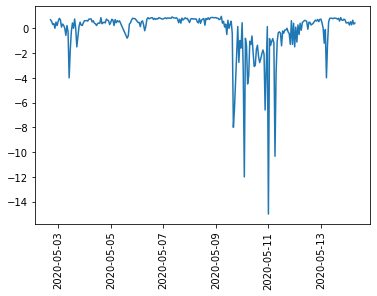

In [100]:
plt.plot(y.index, y)
plt.xticks(rotation=90)

In [103]:
# generates a dataframe for each column in the excel file
MS_106TK01 = generate_df_from_analysis(MS_lab, 'B', 'C', 'BD', 'Zn_Drop')

2020-05-02 17:00:00 0.6875
2020-05-02 18:00:00 0.55
2020-05-02 19:00:00 0.3076923076923076
2020-05-02 20:00:00 0.3793103448275862
2020-05-02 21:00:00 0
2020-05-02 22:00:00 0.5
2020-05-02 23:00:00 0.21739130434782605
2020-05-03 00:00:00 0.5714285714285714
2020-05-03 01:00:00 0.8
2020-05-03 02:00:00 0.6875
2020-05-03 03:00:00 0.10000000000000009
2020-05-03 04:00:00 0.34482758620689646
2020-05-03 05:00:00 0.23529411764705876
2020-05-03 06:00:00 0
2020-05-03 07:00:00 -0.5714285714285716
2020-05-03 08:00:00 0.2222222222222222
2020-05-03 09:00:00 -0.2857142857142856
2020-05-03 10:00:00 -4
2020-05-03 11:00:00 -1.75
2020-05-03 12:00:00 -0.25
2020-05-03 13:00:00 0.4285714285714285
2020-05-03 14:00:00 0
2020-05-03 15:00:00 0.75
2020-05-03 16:00:00 0
2020-05-03 17:00:00 -1.5
2020-05-03 18:00:00 #DIV/0!
2020-05-03 19:00:00 0.1428571428571429
2020-05-03 20:00:00 0.5
2020-05-03 21:00:00 0.2500000000000001
2020-05-03 22:00:00 0.23076923076923073
2020-05-03 23:00:00 0.44999999999999996
2020-05-04 00:0

In [ ]:
MS_106TK01['Zn_Drop'] = MS_106TK01['Zn_Drop']*100

In [ ]:
MS_106TK01

drop the rows where zn_drop is nan or error

In [64]:
y = MS_106TK01.Zn_Drop

In [ ]:
plt.plot(y.index, y)

In [ ]:
MS_106TK01.to_excel(r'C:\Users\v.t.flores\Documents\MS_106TK01_Zn_drop14052020i.xlsx')

In [40]:
MS_106TK01['Zn_Drop'][50:100]

DATETIME
2020-05-03 08:00:00                                                   60
2020-05-03 09:00:00                                              85.7143
2020-05-03 10:00:00                                                 37.5
2020-05-03 11:00:00                                              17.6471
2020-05-03 12:00:00    #DIV/0!#DIV/0!#DIV/0!#DIV/0!#DIV/0!#DIV/0!#DIV...
2020-05-03 13:00:00                                                  100
2020-05-03 14:00:00    #DIV/0!#DIV/0!#DIV/0!#DIV/0!#DIV/0!#DIV/0!#DIV...
2020-05-03 15:00:00                                               80.303
2020-05-03 16:00:00                                                   90
2020-05-03 17:00:00                                              90.6977
2020-05-03 18:00:00                                              82.8571
2020-05-03 19:00:00                                                   20
2020-05-03 20:00:00                                             -466.667
2020-05-03 21:00:00                       

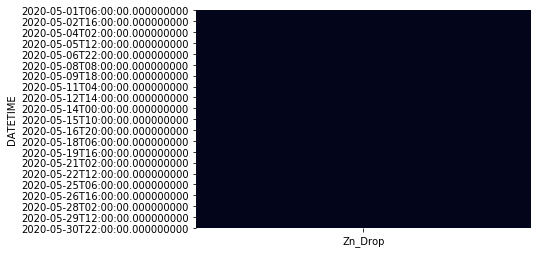

In [20]:
sns.heatmap(MS_106TK01.isnull(), cbar=False)

In [11]:
#fill the nan values with the average of surrounding values
for i in range(0, len(MS_106TK01.columns)):
    ave_filler(MS_106TK01.columns[i])
MS_106TK01 = MS_106TK01.fillna(method='bfill')
MS_106TK01

,Zn_Drop
DATETIME,
2020-01-01 06:00:00,89.230769
2020-01-01 07:00:00,69.767442
2020-01-01 08:00:00,82.692308
2020-01-01 09:00:00,82.716049
2020-01-01 10:00:00,83.750000
...,...
2020-01-31 01:00:00,81.818182
2020-01-31 02:00:00,76.712329
2020-01-31 03:00:00,61.702128


In [22]:
df_Pi_Lab = df_main.join(df_Pi, how='outer')

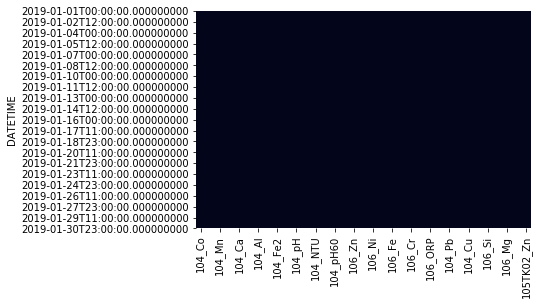

In [30]:
len(df_Pi_Lab.columns)

50

In [31]:
for i in range(0, 36):
    colname = df_Pi_Lab.columns[i]
    df_Pi_Lab[colname] = df_Pi_Lab[colname].where(df_Pi_Lab[colname].notnull(), other=(df_Pi_Lab[colname].fillna(method='ffill') + df_Pi_Lab[colname].fillna(method='bfill'))/2)

#### Create a new column to reflect the actual H2S flow to dezn

In [32]:
df_Pi_Lab['105TK01_H2S_FR'] = np.where(df_Pi_Lab['105TK01_H2S_FR_A']>df_Pi_Lab['105TK01_H2S_FR_B'], df_Pi_Lab['105TK01_H2S_FR_A'], df_Pi_Lab['105TK01_H2S_FR_B'])
df_Pi_Lab['105TK02_H2S_FR'] = np.where(df_Pi_Lab['105TK02_H2S_FR_A']>df_Pi_Lab['105TK02_H2S_FR_B'], df_Pi_Lab['105TK02_H2S_FR_A'], df_Pi_Lab['105TK02_H2S_FR_B'])

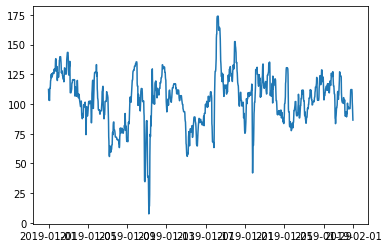

In [33]:
y = df_Pi_Lab['105TK02_H2S_FR']
x = df_Pi_Lab.index
plt.plot(x, y)
plt.show()

In [34]:
df_Pi_Lab.columns

Index(['104_Co', '104_Fe', '104_Mn', '104_Cr', '104_Ca', '104_Si', '104_Al',
       '104_Mg', '104_Fe2', '104_Fe3', '104_pH', '104_ORP', '104_NTU',
       '104_Ftime', '104_pH60', '106_Pb', '106_Zn', '106_Cu', '106_Ni',
       '106_Co', '106_Fe', '106_Mn', '106_Cr', '106_Ca', '106_ORP',
       '106_ZnbyNi', '104_Pb', '104_Zn', '104_Cu', '104_Ni', '106_Si',
       '106_Al', '106_Mg', '106_pH', '105TK02_Zn', 'DeZn_Feed_FR',
       'DeZn_Feed_Temp', '105TK01_H2S_FR_A', '105TK01_H2S_FR_B',
       '105TK01_N2_FR', '105TK01_Press', '105TK02_Press', '105TK02_H2S_FR_A',
       '105TK02_H2S_FR_B', 'Seed_FR', '105TK03_Press', '105TK05_Press',
       '105TK05_Temp', '105TK05_steam', '105TK05_level', '105TK01_H2S_FR',
       '105TK02_H2S_FR'],
      dtype='object')

In [35]:
df_Pi_Lab = df_Pi_Lab.fillna(method='ffill')

###### The syntax for selecting part of the dataframe that satisfies your condition is:
    df[df[colname] > some_number]

In [36]:
df_Pi_Lab[df_Pi_Lab['DeZn_Feed_FR']<500]

,104_Co,104_Fe,104_Mn,104_Cr,104_Ca,104_Si,104_Al,104_Mg,104_Fe2,104_Fe3,...,105TK02_H2S_FR_A,105TK02_H2S_FR_B,Seed_FR,105TK03_Press,105TK05_Press,105TK05_Temp,105TK05_steam,105TK05_level,105TK01_H2S_FR,105TK02_H2S_FR
DATETIME,,,,,,,,,,,,,,,,,,,,,
2019-01-10 18:30:00,0.386950,1.060000,3.75700,0.138175,0.672325,0.339850,3.90000,6.73875,0.86225,0.182500,...,35.692500,5.9475,14.802812,0.38356,0.044480,75.899001,10893.448079,76.864000,14.847000,35.692500
2019-01-10 19:00:00,0.387800,1.052000,3.76600,0.138700,0.676600,0.342400,3.90500,6.75300,0.86300,0.189000,...,34.780501,5.8485,14.961681,0.38756,0.119500,76.755001,10851.754590,73.909999,14.891667,34.780501
2019-01-10 19:30:00,0.387000,1.066625,3.77000,0.138550,0.677950,0.341025,3.91100,6.73200,0.87450,0.177250,...,34.579500,4.5630,14.790170,0.43148,0.233713,77.261002,10896.849577,74.438334,14.887000,34.579500
2019-01-10 20:00:00,0.386200,1.081250,3.77400,0.138400,0.679300,0.339650,3.91700,6.71100,0.88600,0.165500,...,41.335500,4.1745,14.760943,0.93240,0.296080,77.703500,10720.968587,70.808000,18.091333,41.335500
2019-01-11 02:00:00,0.391450,0.869900,3.81050,0.132150,0.677900,0.332550,3.87650,6.88500,0.81450,0.140750,...,39.267001,5.5410,4.005027,0.35636,0.177860,75.495999,9190.670915,80.226666,16.593000,39.267001
2019-01-11 02:30:00,0.394875,0.864700,3.82475,0.129175,0.675850,0.330375,3.85025,6.99300,0.76725,0.140125,...,38.561999,6.0495,4.942510,0.38158,0.033260,75.691003,7706.064616,81.037000,16.609000,38.561999
2019-01-11 03:00:00,0.398300,0.859500,3.83900,0.126200,0.673800,0.328200,3.82400,7.10100,0.72000,0.139500,...,39.247500,6.4605,4.932842,0.43796,0.042267,75.770998,7687.250749,81.862666,16.898000,39.247500
2019-01-11 03:30:00,0.392050,0.867925,3.79075,0.127750,0.669700,0.327350,3.80575,6.94275,0.74200,0.142425,...,39.219000,6.0705,4.891214,0.46042,0.197740,75.838000,7697.802344,82.795666,16.893333,39.219000
2019-01-11 04:00:00,0.385800,0.876350,3.74250,0.129300,0.665600,0.326500,3.78750,6.78450,0.76400,0.145350,...,35.755500,6.1800,4.936802,0.45482,0.291847,75.930501,7721.619678,87.372000,14.593667,35.755500


### SAVE THE DATAFRAME TO EXCEL

In [37]:
df_Pi_Lab.to_excel(r'C:\Users\v.t.flores\Documents\df_Pi_Lab201901ii.xlsx')